# 🌌 Exoplanet Classification Project

## Project Overview

In this project, I used a real-world dataset of confirmed exoplanets to build a classification model that predicts the **type of exoplanet** based on planetary and stellar attributes such as mass, radius, orbital characteristics, and distance from Earth. 

After performing data cleaning and exploratory data analysis (EDA), I carried out feature engineering to prepare the dataset for model training. The goal is to identify which planetary and stellar features contribute most to classification performance.

## Objective

To build and evaluate machine learning models using real-world astronomical data.

## Project Steps
- [x] Data exploration and cleaning  
- [x] Feature selection/engineering  
- [ ] Model selection and training  
- [ ] Model evaluation
- [ ] Results and conclusion

## Exploratory Data Analysis (EDA)

* #### Loading and inspecting the data
* #### Cleaning the data
* #### Visualizing the data for EDA

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("exoplanet_data.csv") 

# Display first few rows
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [3]:
# Understanding data structure

# Shape of dataset
print('Shape', df.shape)

# Data types and non-null values
df.info()

# Basic statistics
df.describe()

Shape (5250, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


In [4]:
# Drop unnecessary columns
df.drop(columns = ['mass_wrt', 'radius_wrt'], inplace = True) # If mass_wrt and radius_wrt are always Jupiter, they don't add value

In [5]:
# Check for duplicates
df.duplicated().sum()
df = df.drop_duplicates()

# Check to confirm
print(df.shape)
df.head()

(5250, 11)


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,1.08,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,1.09,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,1.15,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,1.12,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,1.20,1.660000,2.200000,0.68,Radial Velocity


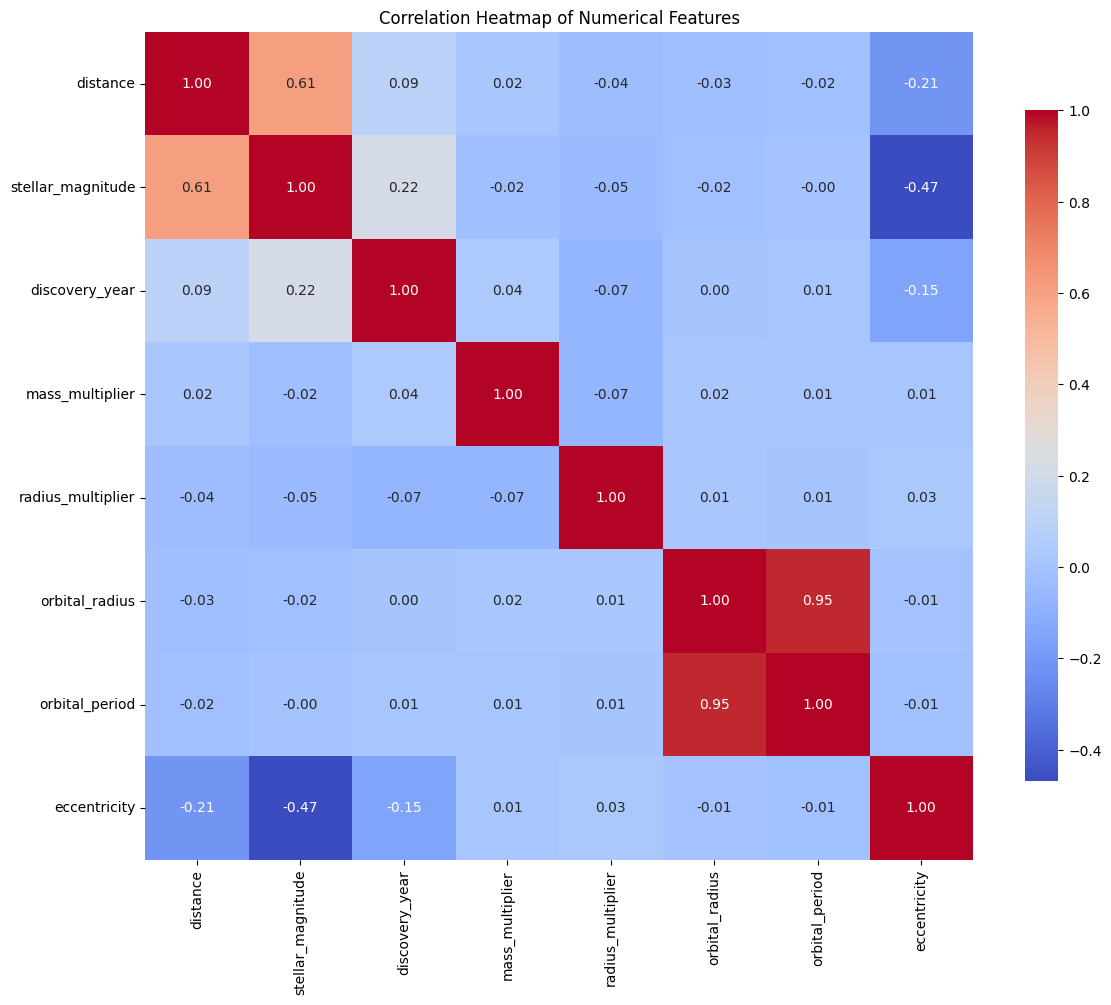

In [6]:
# Visualizations for EDA

# Select numerical features only
numerical_df = df.select_dtypes(include = ['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize = (12, 10)) 
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', square = True, cbar_kws = {'shrink': .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## Interpretation for the heatmap above:

* **Values near 1** → strong positive correlation
* **Values near -1** → strong negative correlation
* **Values near 0** → little to no correlation
* **High correlation between features (e.g., orbital_radius vs. orbital_period)** — this can hint at multicollinearity for modeling

## Feature Engineering 

For this next step, I'll be performing Feature engineering which is the process of transforming raw data into meaningful features that improve model performance. Here are the steps I'll be taking.

- #### Performing train/test split
- #### Encoding variables
- #### Impute missing values if any
- #### Preparing the dataset for modeling

In [7]:
# Performing train/test split

# Features
X = df.drop(columns = ['planet_type', 'name']) # 'name' will not be useful for modeling

# Target variable
y = df['planet_type']

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) # the argument stratify = y ensures that the class distribution of the target variable is preserved in both the training and test sets.

In [8]:
# Use LabelEncoder after splitting
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit on y_train and transform both
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [9]:
# One-hot encode 'detection_method' after splitting
X_train = pd.get_dummies(X_train, columns=['detection_method'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['detection_method'], drop_first=True)

# Align train and test columns; fill_value = 0 adds any missing columns with 0s to ensure both sets have identical features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value = 0)

In [10]:
# Check for missing values
X_train.isnull().sum().sort_values(ascending=False)

orbital_radius                                    218
stellar_magnitude                                 121
mass_multiplier                                    17
radius_multiplier                                  14
distance                                           13
discovery_year                                      0
orbital_period                                      0
eccentricity                                        0
detection_method_Direct Imaging                     0
detection_method_Disk Kinematics                    0
detection_method_Eclipse Timing Variations          0
detection_method_Gravitational Microlensing         0
detection_method_Orbital Brightness Modulation      0
detection_method_Pulsar Timing                      0
detection_method_Pulsation Timing Variations        0
detection_method_Radial Velocity                    0
detection_method_Transit                            0
detection_method_Transit Timing Variations          0
dtype: int64

In [11]:
# Impute missing values 
columns_to_impute = ['orbital_radius', 'stellar_magnitude', 'mass_multiplier',
                     'distance', 'radius_multiplier']

# Create SimpleImputer object and transform it
imputer = SimpleImputer(strategy='median')
X_train[columns_to_impute] = imputer.fit_transform(X_train[columns_to_impute])
X_test[columns_to_impute] = imputer.transform(X_test[columns_to_impute])

In [12]:
# Check to confirm no missing values
print(X_train.isnull().sum().sort_values(ascending=False))
print("Train missing:", X_train.isnull().sum().sum())
print("Test missing:", X_test.isnull().sum().sum())

distance                                          0
stellar_magnitude                                 0
discovery_year                                    0
mass_multiplier                                   0
radius_multiplier                                 0
orbital_radius                                    0
orbital_period                                    0
eccentricity                                      0
detection_method_Direct Imaging                   0
detection_method_Disk Kinematics                  0
detection_method_Eclipse Timing Variations        0
detection_method_Gravitational Microlensing       0
detection_method_Orbital Brightness Modulation    0
detection_method_Pulsar Timing                    0
detection_method_Pulsation Timing Variations      0
detection_method_Radial Velocity                  0
detection_method_Transit                          0
detection_method_Transit Timing Variations        0
dtype: int64
Train missing: 0
Test missing: 0


## Feature Engineering Summary

In this step, I transformed the raw data into features suitable for modeling. The key actions were:

- **Train/test split**: Used stratified sampling based on `planet_type`.
- **Encoding categorical variables**:
  - Label encoded the target variable `planet_type`.
  - One-hot encoded the `detection_method` feature (with `drop_first=True`).
- **Imputed missing values**:
  - Applied median imputation to numerical features like `orbital_radius`, `stellar_magnitude`, and others.

All preprocessing was done **after the split** to avoid data leakage. The dataset is now clean and ready for modeling.